In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(37)

## Triangular

$ f(x) =
\begin{cases}
    0 & \text{for } x < a, \\
    \frac{2(x-a)}{(b-a)(c-a)} & \text{for } a \le x < c, \\[4pt]
    \frac{2}{b-a}             & \text{for } x = c, \\[4pt]
    \frac{2(b-x)}{(b-a)(b-c)} & \text{for } c < x \le b, \\[4pt]
    0 & \text{for } b < x.
\end{cases}$

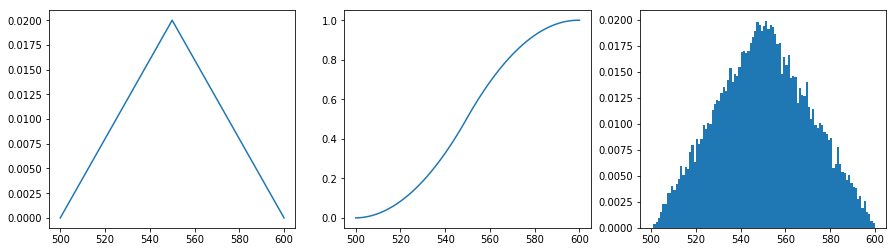

In [15]:
class Triangle(object):
    @staticmethod
    def pdf(x, a, m, b):
        if b < x < a:
            return 0.0
        elif a <= x < m:
            return (2 * (x - a)) / ((b - a) * (m - a))
        elif x == m:
            return (2 / (b - a))
        elif m < x <= b:
            return (2 * (b - x)) / ((b - a) * (b - m))
        raise Exception(f'No conditions satisifed x={x}, {a}, {m}, {b}')
        
    @staticmethod
    def cdf(a, m, b):
        p = np.array([Triangle.pdf(x, a, m, b) for x in range(a, b+1)])
        c = p.cumsum()
        return c
    
    @staticmethod
    def rvs(a, m, b, size=1):
        o = {i:v for i, v in enumerate(range(a, b+1))}
        c = Triangle.cdf(a, m, b)
        u = uniform(size=size)
        s = [o[np.argmax(c >= x)] for x in u]
        return np.array(s)
    
a, m, b = 500, 550, 600

p = [Triangle.pdf(x, a, m, b) for x in range(a, b+1)]
c = Triangle.cdf(a, m, b)
s = Triangle.rvs(a, m, b, size=20000)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
_ = ax[0].plot(list(range(a, b+1)), p)
_ = ax[1].plot(list(range(a, b+1)), c)
_ = ax[2].hist(s, bins=list(range(a, b+1)), density=True)

## Beta

$f(x) = \phi \frac{\Gamma(\theta_1 + \theta_2)}{\Gamma(\theta_1) \Gamma(\theta_2) (b - a)^{\theta_1 + \theta_2 - 1}}$

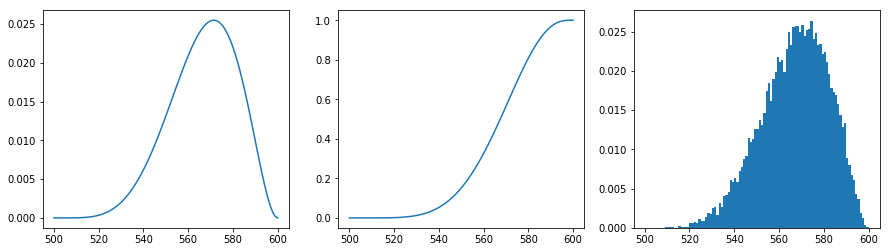

In [30]:
from scipy.special import gamma
from numpy.random import uniform

class Beta(object):
    @staticmethod
    def pdf(x, a, b, theta_1, theta_2):
        p = gamma(theta_1 + theta_2)
        p = p / gamma(theta_1)
        p = p / gamma(theta_2)
        p = p / (b - a)**(theta_1 + theta_2 - 1)
        p = p * (x - a)**(theta_1 - 1)
        p = p * (b - x)**(theta_2 - 1)
        return p

    @staticmethod
    def cdf(a, b, theta_1, theta_2):
        p = np.array([Beta.pdf(x, a, b, theta_1, theta_2) for x in range(a, b+1)])
        c = p.cumsum()
        return c

    @staticmethod
    def rvs(a, b, theta_1, theta_2, size=1):
        o = {i:v for i, v in enumerate(range(a, b+1))}
        c = Beta.cdf(a, b, theta_1, theta_2)
        u = uniform(size=size)
        s = [o[np.argmax(c >= x)] for x in u]
        return np.array(s)
    
a, b = 500, 600
theta_1, theta_2 = 6, 3

p = [Beta.pdf(x, a, b, theta_1, theta_2) for x in range(a, b+1)]
c = Beta.cdf(a, b, theta_1, theta_2)
s = Beta.rvs(a, b, theta_1, theta_2, size=20000)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
_ = ax[0].plot(list(range(a, b+1)), p)
_ = ax[1].plot(list(range(a, b+1)), c)
_ = ax[2].hist(s, bins=list(range(a, b+1)), density=True)

## Beta rectangular

$f(x) = \phi \frac{\Gamma(\theta_1 + \theta_2)}{\Gamma(\theta_1) \Gamma(\theta_2) (b - a)^{\theta_1 + \theta_2 - 1}} + \frac{1 - \theta}{b - a}$

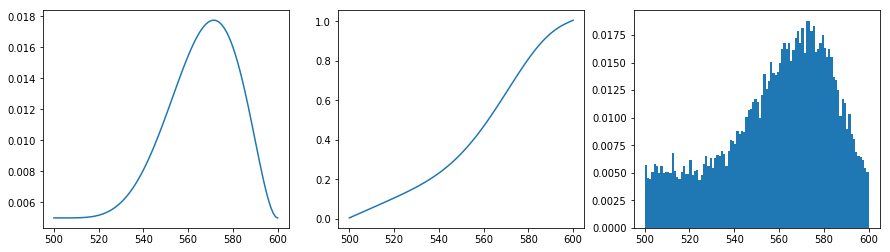

In [32]:
class BetaRect(object):
    @staticmethod
    def pdf(x, a, b, theta_1, theta_2, theta):
        p = gamma(theta_1 + theta_2)
        p = p / gamma(theta_1)
        p = p / gamma(theta_2)
        p = p / (b - a)**(theta_1 + theta_2 - 1)
        p = p * (x - a)**(theta_1 - 1)
        p = p * (b - x)**(theta_2 - 1)
        p = p * theta
        p = p + ((1 - theta) / (b - a))
        return p

    @staticmethod
    def cdf(a, b, theta_1, theta_2, theta):
        p = np.array([BetaRect.pdf(x, a, b, theta_1, theta_2, theta) for x in range(a, b+1)])
        c = p.cumsum()
        return c

    @staticmethod
    def rvs(a, b, theta_1, theta_2, theta, size=1):
        o = {i:v for i, v in enumerate(range(a, b+1))}
        c = BetaRect.cdf(a, b, theta_1, theta_2, theta)
        u = uniform(size=size)
        s = [o[np.argmax(c >= x)] for x in u]
        return np.array(s)

a, b = 500, 600
theta_1, theta_2 = 6, 3
theta = 0.5

p = [BetaRect.pdf(x, a, b, theta_1, theta_2, theta) for x in range(a, b+1)]
c = BetaRect.cdf(a, b, theta_1, theta_2, theta)
s = BetaRect.rvs(a, b, theta_1, theta_2, theta, size=20000)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
_ = ax[0].plot(list(range(a, b+1)), p)
_ = ax[1].plot(list(range(a, b+1)), c)
_ = ax[2].hist(s, bins=list(range(a, b+1)), density=True)

## Doubly-truncated

$f(x)=\frac{\phi(\frac{x - \mu}{\sigma})}{\sigma( \Phi(\frac{b - \mu}{\sigma}) - \Phi(\frac{b - \mu}{\sigma}) )}$

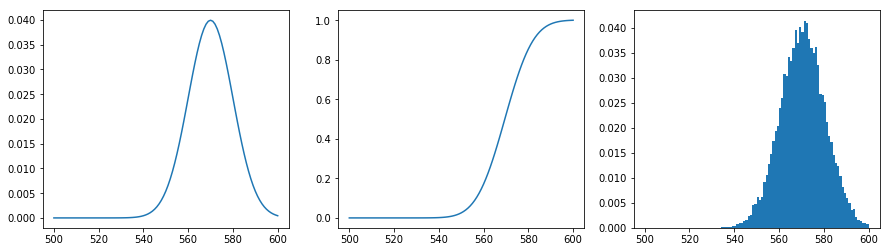

In [33]:
from scipy.stats import norm

class DoublyTruncated(object):
    @staticmethod
    def pdf(x, a, b, mu, sigma):
        n = norm.pdf((x - mu) / sigma)
        d1 = norm.cdf((b - mu) / sigma)
        d2 = norm.cdf((a - mu) / sigma)
        d = sigma * (d1 - d2)
        p = n / d
        return p

    @staticmethod
    def cdf(a, b, mu, sigma):
        p = np.array([DoublyTruncated.pdf(x, a, b, mu, sigma) for x in range(a, b+1)])
        c = p.cumsum()
        return c

    @staticmethod
    def rvs(a, b, mu, sigma, size=1):
        o = {i:v for i, v in enumerate(range(a, b+1))}
        c = DoublyTruncated.cdf(a, b, mu, sigma)
        u = uniform(size=size)
        s = [o[np.argmax(c >= x)] for x in u]
        return np.array(s)

a, b = 500, 600
mu, sigma = 570, 10

p = [DoublyTruncated.pdf(x, a, b, mu, sigma) for x in range(a, b+1)]
c = DoublyTruncated.cdf(a, b, mu, sigma)
s = DoublyTruncated.rvs(a, b, mu, sigma, size=20000)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
_ = ax[0].plot(list(range(a, b+1)), p)
_ = ax[1].plot(list(range(a, b+1)), c)
_ = ax[2].hist(s, bins=list(range(a, b+1)), density=True)

## Log-normal

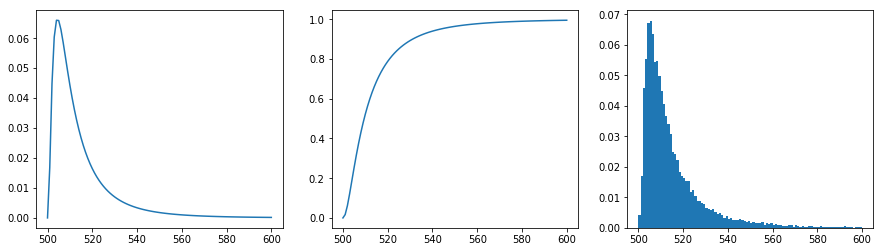

In [56]:
from scipy.stats import lognorm

class LogNormal(object):
    @staticmethod
    def pdf(x, s, mu, sigma):
        return lognorm.pdf(x, s, loc=mu, scale=sigma)

    @staticmethod
    def cdf(s, mu, sigma):
        p = np.array([LogNormal.pdf(x, s, mu, sigma) for x in range(a, b+1)])
        c = p.cumsum()
        return c

    @staticmethod
    def rvs(s, mu, sigma, size=1):
        o = {i:v for i, v in enumerate(range(a, b+1))}
        c = LogNormal.cdf(s, mu, sigma)
        u = uniform(size=size)
        s = [o[np.argmax(c >= x)] for x in u]
        return np.array(s)
    
mu, sigma, s = 500, 10, 0.9

p = [LogNormal.pdf(x, s, mu, sigma) for x in range(a, b+1)]
c = LogNormal.cdf(s, mu, sigma)
s = LogNormal.rvs(s, mu, sigma, size=20000)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
_ = ax[0].plot(list(range(a, b+1)), p)
_ = ax[1].plot(list(range(a, b+1)), c)
_ = ax[2].hist(s, bins=list(range(a, b+1)), density=True)

## Weibull

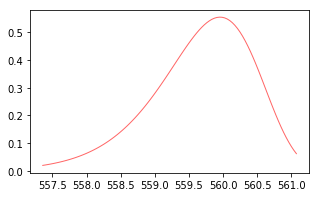

In [51]:
from scipy.stats import weibull_min

loc, scale, s = 550, 10, 15
x = np.linspace(weibull_min.ppf(0.01, s, loc=loc, scale=scale), weibull_min.ppf(0.99, s, loc=loc, scale=scale), 100)

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, weibull_min.pdf(x, s, loc=loc, scale=scale), 'r-', lw=1, alpha=0.6, label='weibull pdf')